In [1]:
import numpy as np
import netCDF4 as nc
import os
import scipy.io as sio
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
from salishsea_tools.nc_tools import scDataset
import sys
from matplotlib import colors
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/upwelling_depth/')
import upwelling_functions
%matplotlib inline
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

/home/imachuca/anaconda3/envs/gsw/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [61]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
#print('wavenumber, wavenumber_first, numb_freq, increment', k_eyeballed, k_first, numb_freq, increment)

#for i in range(numb_freq):
#    k_next = np.round((i*increment)+k_first,12)
#    print(i,k_next)

In [3]:
k_eyeballed = 4.62e-07

In [4]:
# changing frequency guesses

k_first= np.round(k_eyeballed*0.05,10)
increment = np.round(k_first*0.75,10)
numb_freq = 200
f_guess = 3.3e-06

#print(f_guess*1,numb_freq,k_first,increment) # wave
#print(f_guess*2) # none
#print(f_guess*1.5) # wave
#print(f_guess*1.8) # none
#print(f_guess*1.7) # none - cancelled
#print(f_guess*1.6) # none
#print(f_guess*1.52) # wave

In [17]:
# reducing the wavenumbers to find higher frequencies (i.e. lower modes)

k_first= np.round(k_eyeballed*0.005,10)
increment = np.round(k_first*0.75,10)
numb_freq = 200
f_guess = 3.3e-06

#print(f_guess*1.6,numb_freq,k_first,increment) # first without wave

1.7e-09


# Sets of $\omega$-$\kappa$

|label|frequency first guess|number of frequencies|first wavenumber|increments|filename|
|-----|--------|----|---------|---------|---------------|
|A|3.3e-06 |200 |2.31e-08 |1.73e-08 |dispc_33e06.dat|
|B|4.95e-06 |200 |2.31e-08 |1.73e-08 |dispc_495e06.dat|
|C|5.016e-06 |200 |2.31e-08 |1.73e-08 |dispc_502e06.dat|
|D|5.28e-06 |50 |2.3e-09 |1.7e-09|dispc_528e06.dat|
|E|0.008 |50 |1.15e-09 |8.62e-10|dispc_08e2.dat|

# Dispersion curves

In [6]:
def axis_properties(ax, xmin, xmax, ymin, ymax):
    ax.legend(fontsize=20, loc=2)
    ax.axhline(0,lw=2,c='k',zorder=1)
    ax.set_xlabel('wavenumber $\kappa$ (rad/cm)', fontsize=16)
    ax.set_ylabel('frequency $\omega$ (rad/sec)', fontsize=16)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    return

run this to find complete dispersion 5.421e-07 4.3113902e-05


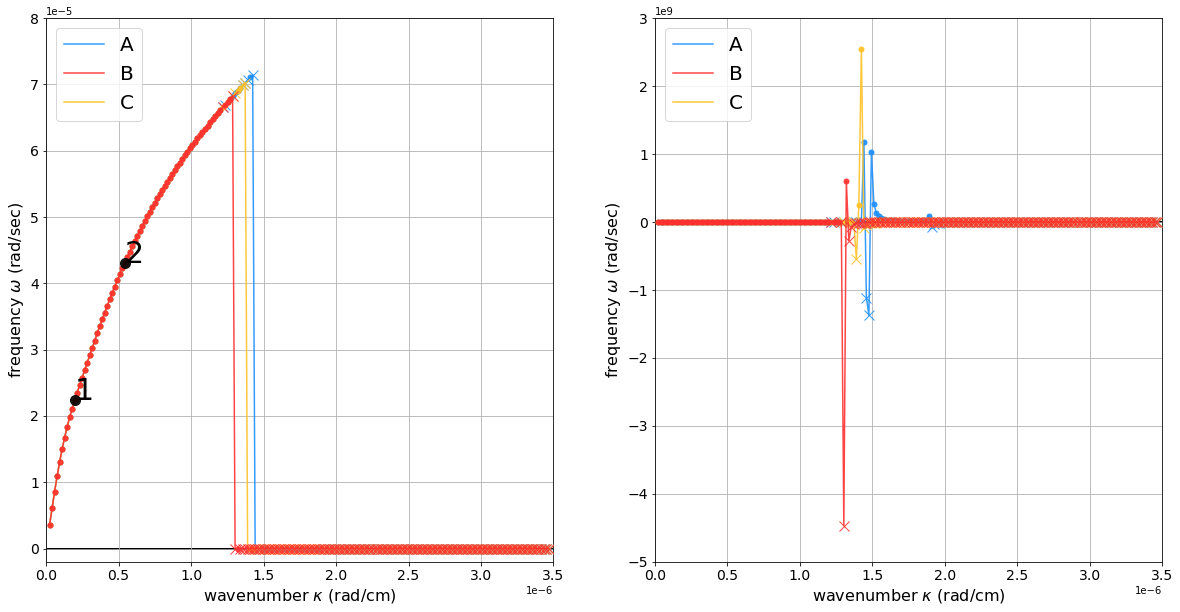

In [18]:
fnames = ['dispc_33e06.dat', 'dispc_495e06.dat', 'dispc_502e06.dat']
colours = ['#1E90FF', '#FF3030', '#FFC125']
zorders = [2, 4, 3]
labels = ['A', 'B', 'C']

fig, (ax, axi) = plt.subplots(1,2,figsize=(20, 10))

for fname, c, zo, lab, n in zip(fnames, colours, zorders, labels, np.arange(len(fnames))):
    output = np.loadtxt('/ocean/imachuca/CTW_Brink/output/'+fname)
    wavenumber = output[:, 0] #rad/cm
    frequency = output[:, 1] #rad/sec
    other_frequency = output[:, 2]
    for i in range(len(wavenumber)):
        if other_frequency[i]<0:
            mk='x'
        else:
            mk='.'
        ax.plot(wavenumber[i], frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
        axi.plot(wavenumber[i], other_frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
        
    ax.plot(wavenumber, frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    axi.plot(wavenumber, other_frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    ax.grid(); axi.grid()
    
    if lab=='B':
        ind=10; ax.plot(wavenumber[ind], frequency[ind], marker='.', ms=20, c='k', alpha=0.9, zorder=zo)
        ax.annotate('1', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=5)
        ind=30; ax.plot(wavenumber[ind], frequency[ind], marker='.', ms=20, c='k', alpha=0.9, zorder=zo)
        ax.annotate('2', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=5)
        #ind=60; ax.plot(wavenumber[ind], frequency[ind], marker='.', ms=20, c='k', alpha=0.2, zorder=zo)
        #ax.annotate('3', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=5)
        print('run this to find complete dispersion', wavenumber[ind], frequency[ind])
    
axis_properties(ax, 0, 3.5e-06, -0.2e-5, 8e-5)
axis_properties(axi, 0, 3.5e-06, -5e09, 3e09)

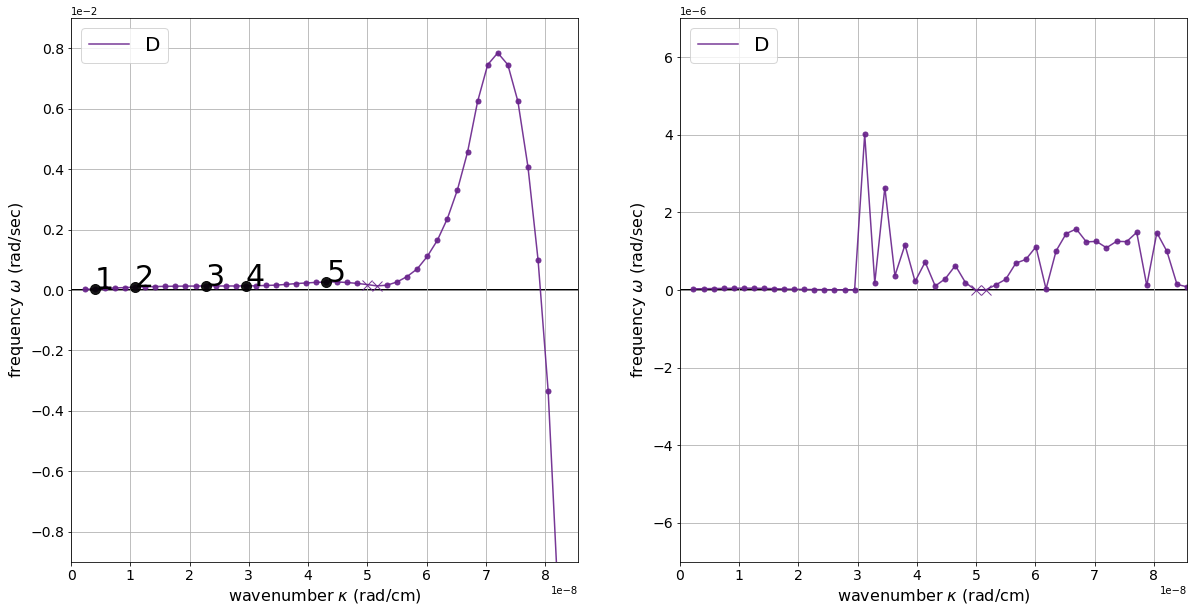

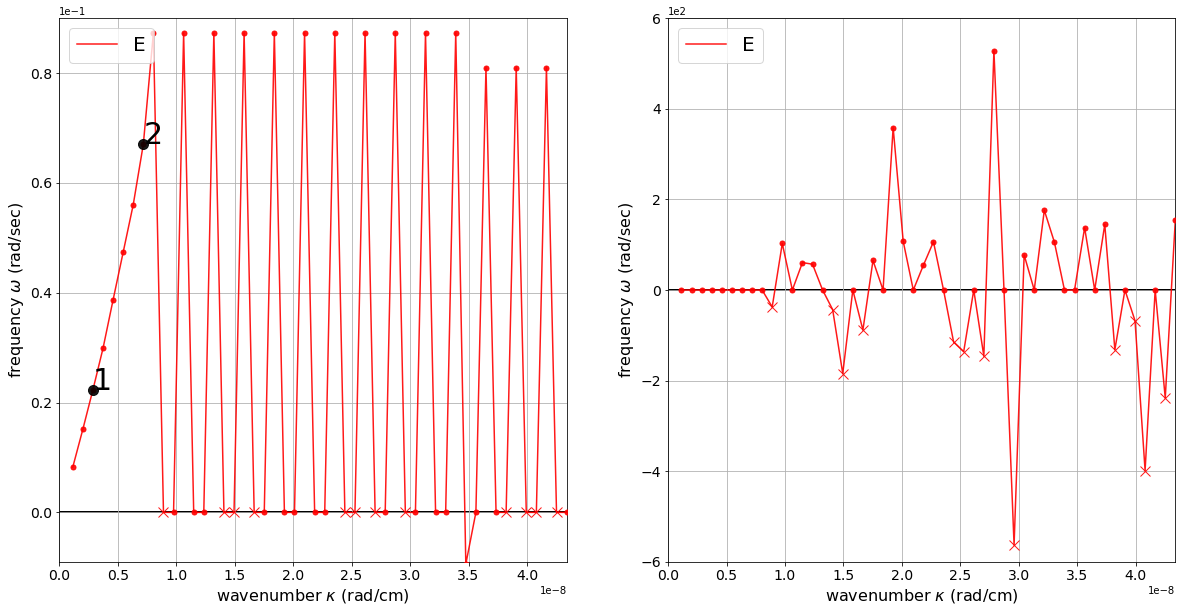

In [68]:
fnames=['dispc_528e06.dat', 'dispc_08e2.dat']
zorders=[2,3]
labels=['D','E']
colours=['#68228B','r']
ymaxs = [9e-3,9e-2]
ymaxsi = [7e-6,600]

for fname, c, zo, lab, ymax, ymaxi, n in zip(fnames, colours, zorders, labels, ymaxs, ymaxsi, np.arange(len(fnames))):
    fig, (ax, axi) = plt.subplots(1,2,figsize=(20, 10))
    output = np.loadtxt('/ocean/imachuca/CTW_Brink/output/'+fname)
    wavenumber = output[:, 0] #rad/cm
    frequency = output[:, 1] #rad/sec
    other_frequency = output[:, 2]
    for i in range(len(wavenumber)):
        if other_frequency[i]<0:
            mk='x'
        else:
            mk='.'
        ax.plot(wavenumber[i], frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
        axi.plot(wavenumber[i], other_frequency[i], marker=mk, ms=10, c=c, alpha=0.9, zorder=zo)
    ax.plot(wavenumber, frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    axi.plot(wavenumber, other_frequency, c=c, alpha=0.9, zorder=zo, label=lab)
    axis_properties(ax, 0, wavenumber.max(), -0.9e-2, ymax)
    axis_properties(axi, 0, wavenumber.max(), -ymaxi, ymaxi)
    ax.grid(); axi.grid()
    
    if fname=='dispc_528e06.dat':
        ind=1; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ax.annotate('1', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=4)
        ind=5; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ax.annotate('2', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=4)
        ind=12; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ax.annotate('3', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=4)
        ind=16; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ax.annotate('4', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=4)
        ind=24; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ax.annotate('5', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=4)
        #print('run this ', wavenumber[ind], frequency[ind])
    
    if fname=='dispc_08e2.dat':
        ind=2; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ax.annotate('1', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=4)
        ind=7; ax.plot(wavenumber[ind], frequency[ind], marker=mk, ms=20, c='k', alpha=0.9, zorder=zo)
        ax.annotate('2', (wavenumber[ind], frequency[ind]), fontsize=30, zorder=4)

# Snapshots of $\omega$-$\kappa$ 
## (corresponding to the black circle markers on dispersion curves B, D, E)

Gray lines are just contours for what's being plotted. Black contours are zeros.

In [69]:
#k_first= np.round(k_eyeballed*0.005,10)*0.5
#increment = np.round(k_first*0.75,12)
#numb_freq = 50
#f_guess = 0.8e-2

#print(f_guess,numb_freq,k_first,increment) # first without wave

In [70]:
def plot_wave_structure(filename, title):
    file = sio.loadmat('/ocean/imachuca/CTW_Brink/output/'+filename)
    z, xpl, xxx, zzz = file['z'][0,:], file['xpl'][0,:], file['xxx'][0,:], file['zzz'][0,:]
    k, f = file['wavenumber'][0][0], file['frequency'][0][0]
    p, u, v, w, r = file['p_profile'], file['u_profile'], file['v_profile'], file['w_profile'], file['r_profile']
    R = file['ratio_for_wave'][0][0]

    ttls = ['pressure', 'u-velocity', 'v-velocity', 'w-velocity', 'rho']
    fig, axes = plt.subplots(3,2,figsize=(20,14), sharex=True, sharey=True)
    for ax, plot_array, ttl in zip(axes.flatten(), [p, u, v, w, r], ttls):
        if ttl=='pressure' or ttl=='rho':
            cmap=cmo.cm.balance
            norm = upwelling_functions.MidpointNormalize(midpoint=0)
        else:
            cmap=cmo.cm.balance
            norm = upwelling_functions.MidpointNormalize(midpoint=0)
            
        cf = ax.contourf(xpl, z, plot_array, cmap=cmap, norm=norm, zorder=1)
        ax.contour(xpl, z, plot_array, 8, linewidths=0.8, colors='gray', zorder=2)
        c = ax.contour(xpl, z, plot_array, levels=[0], linewidths=2, colors='k', zorder=3)
        ax.clabel(c, fmt='%.1f')
        ax.fill_between(xxx, zzz.min(), zzz, facecolor='#8b7765', zorder=4)
        fig.colorbar(cf, ax=ax)
        ax.set_title(ttl, fontsize=20)
        
    axes[-1, -1].annotate('wavenumber \n'+str(k), (100, -300), fontsize=20)
    axes[-1, -1].annotate('frequency \n'+str(f), (100, -600), fontsize=20)
    axes[-1, -1].annotate('ratio \n'+str(R), (100, -900), fontsize=20)
    axes[-1, -1].axis('off')
        
    fig.tight_layout()
    plt.subplots_adjust(top=0.93, wspace=0.01, hspace=0.1)
    fig.suptitle('Mode - '+title, fontsize=24)
    return fig

dispersion curve (B) looks okay, we see ~2 zero crossings within shelf break depth


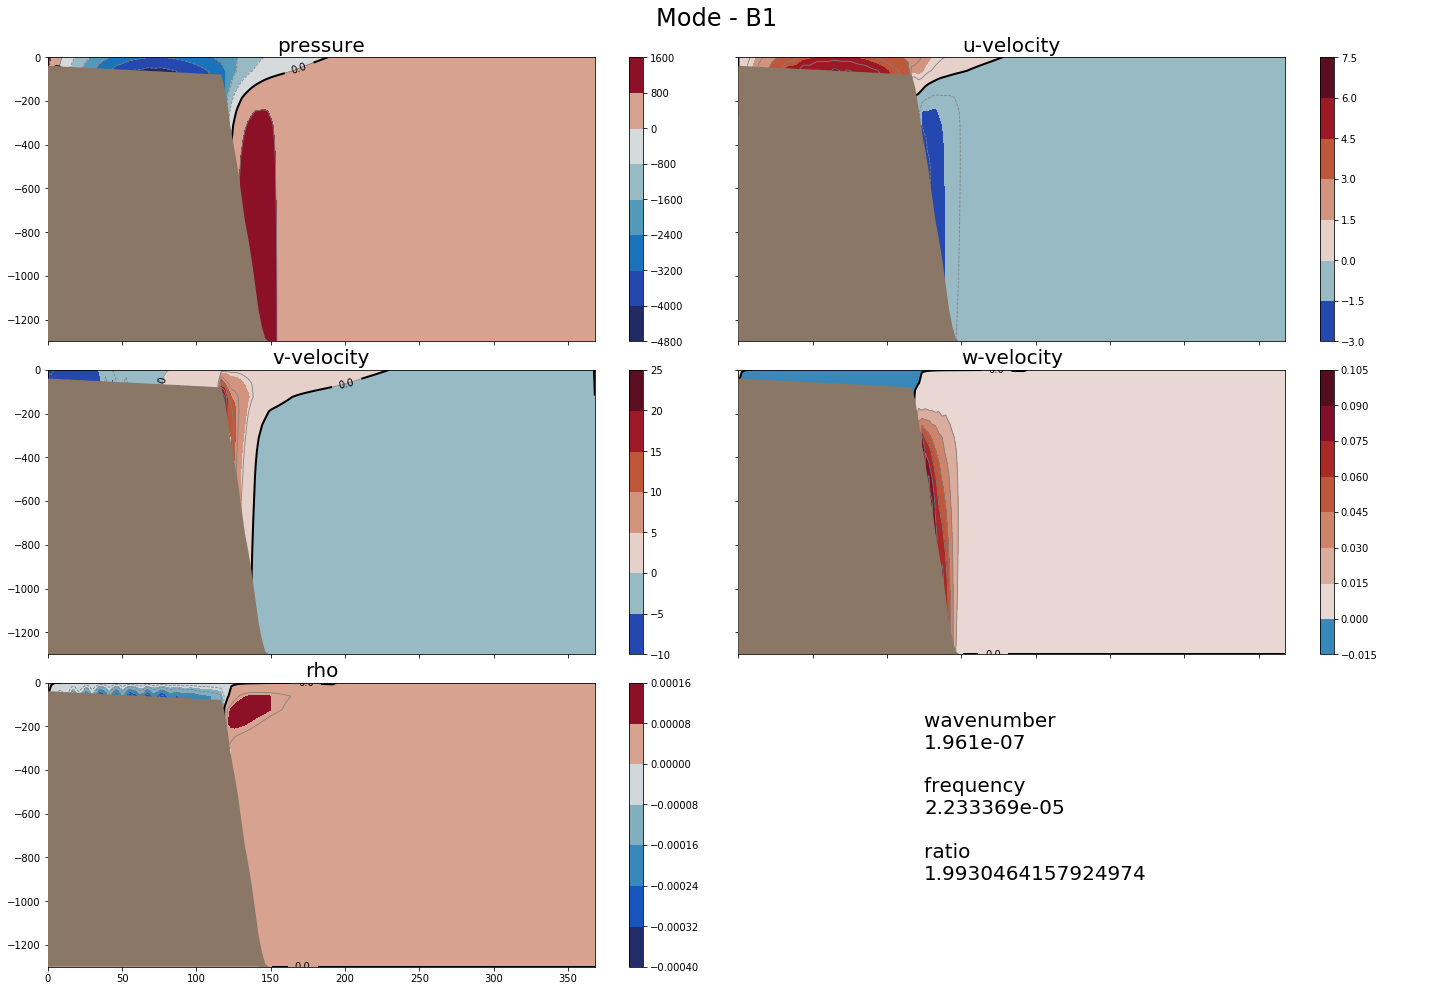

In [71]:
fig = plot_wave_structure('figures_B1.mat', 'B1')
print('dispersion curve (B) looks okay, we see ~2 zero crossings within shelf break depth')

same mode (B), but higher frequency and wavenumber


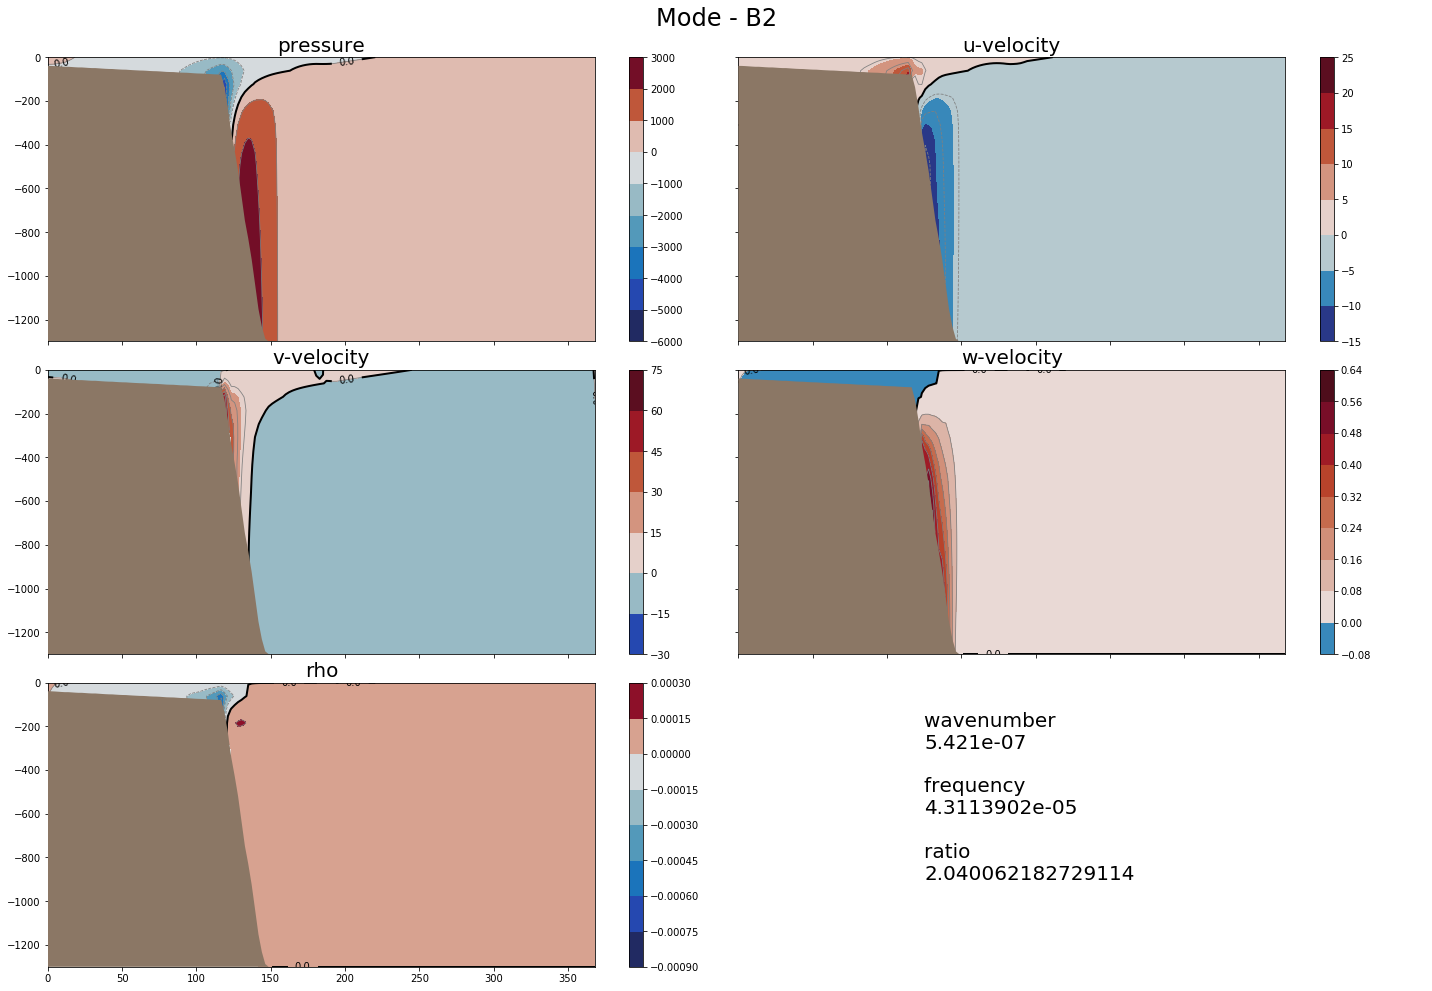

In [72]:
fig = plot_wave_structure('figures_B2.mat', 'B2')
print('same mode (B), but higher frequency and wavenumber')

different mode (D), lower wavenumber, vertical contours for pressure - not barotropic?


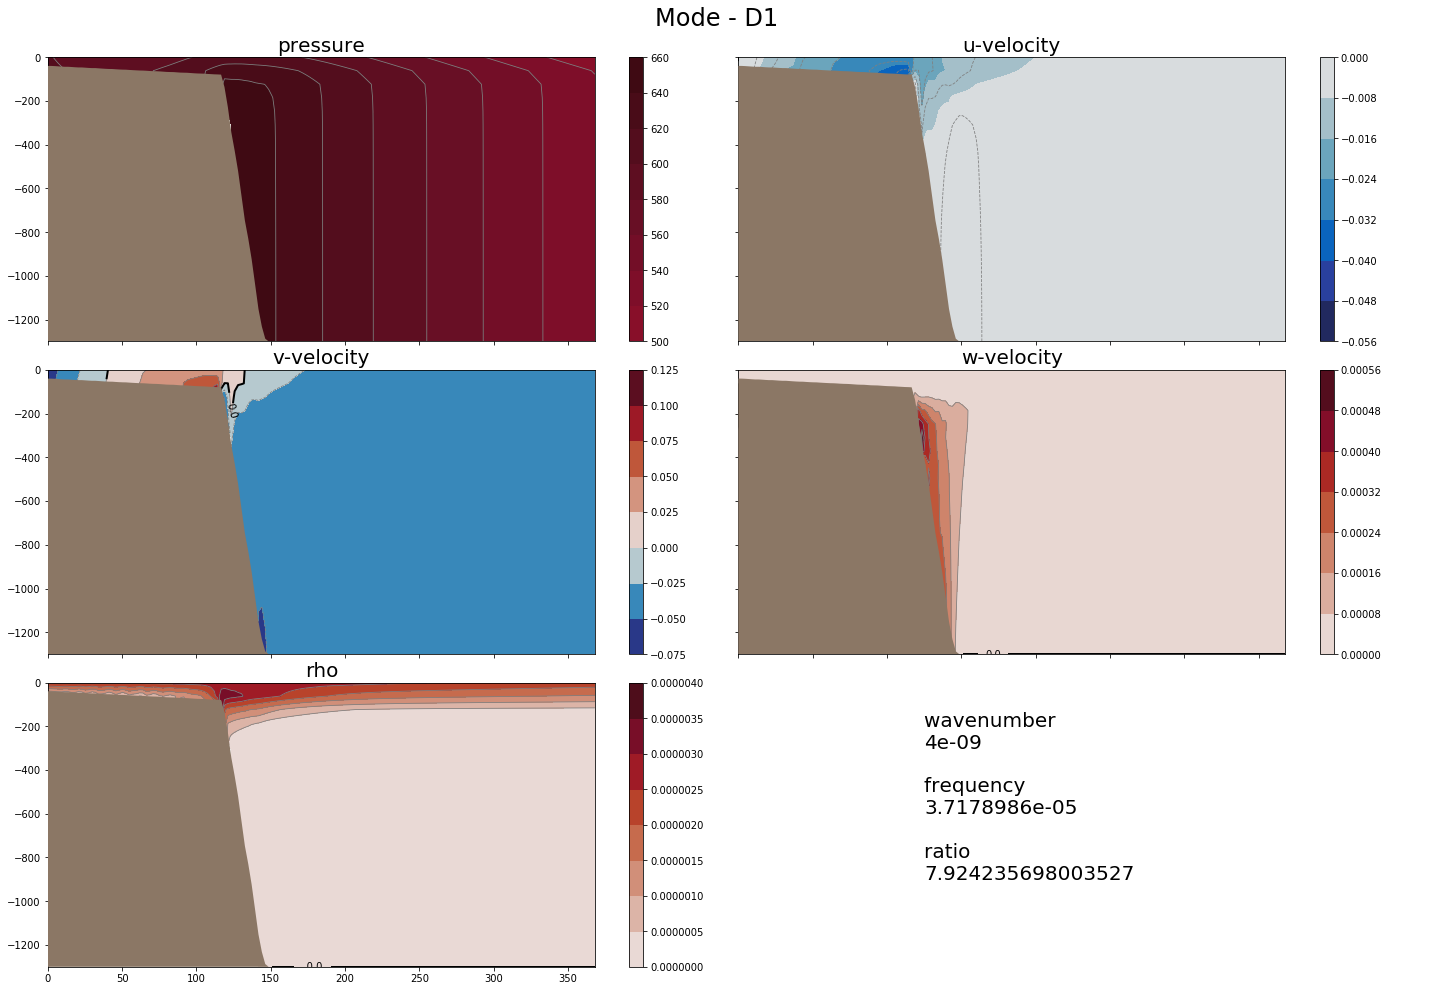

In [73]:
fig = plot_wave_structure('figures_D1.mat', 'D1')
print('different mode (D), lower wavenumber, vertical contours for pressure - not barotropic?')

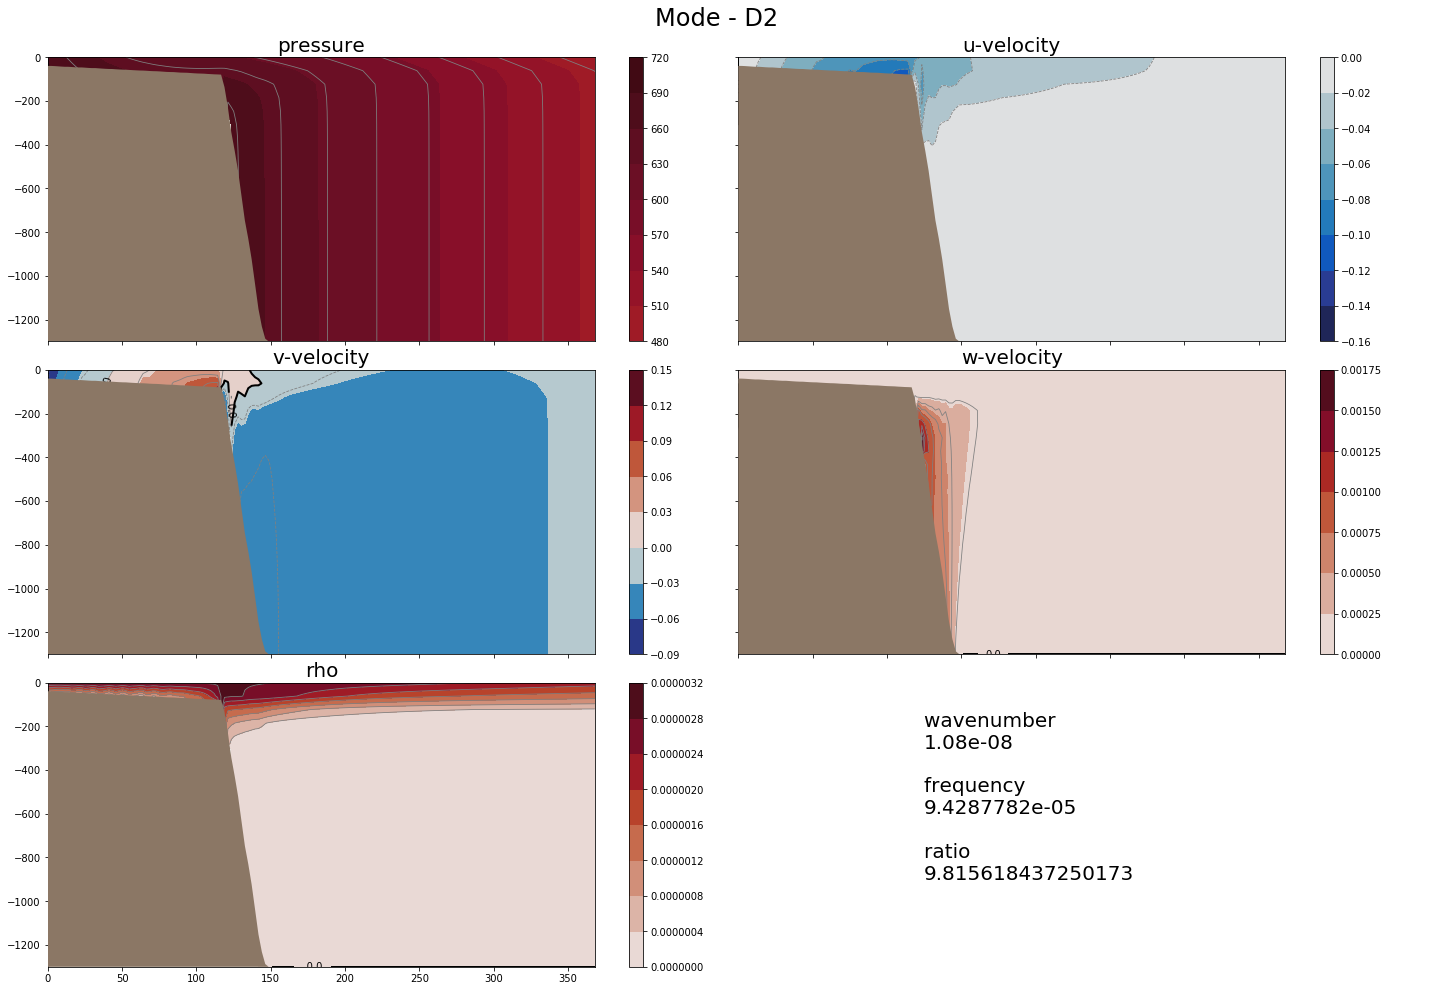

In [74]:
fig = plot_wave_structure('figures_D2.mat', 'D2')

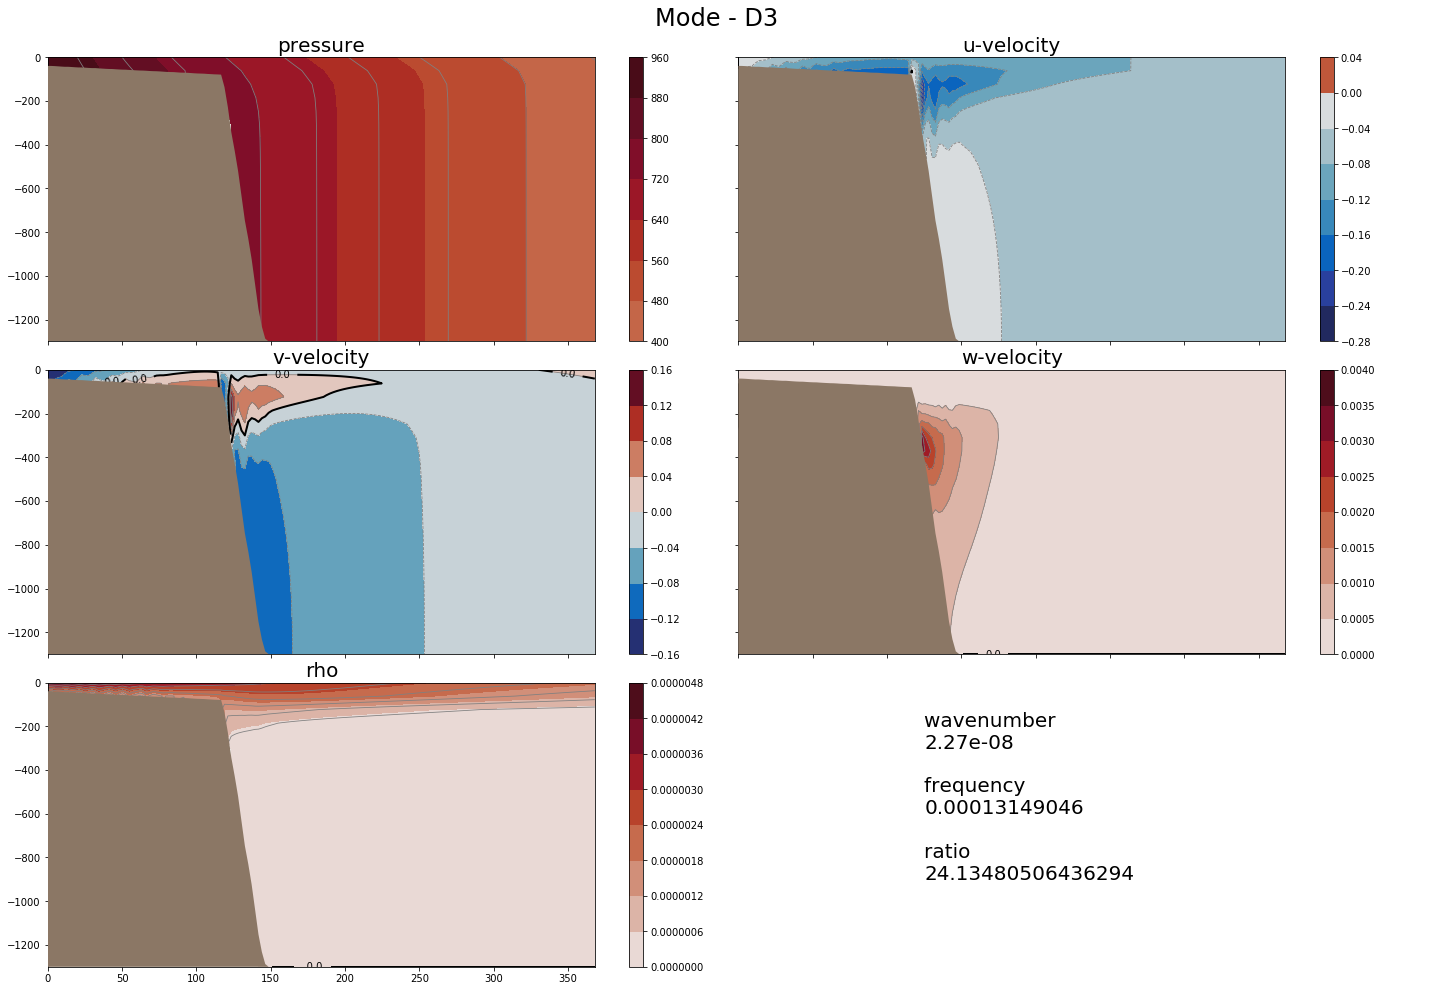

In [75]:
fig = plot_wave_structure('figures_D3.mat', 'D3')

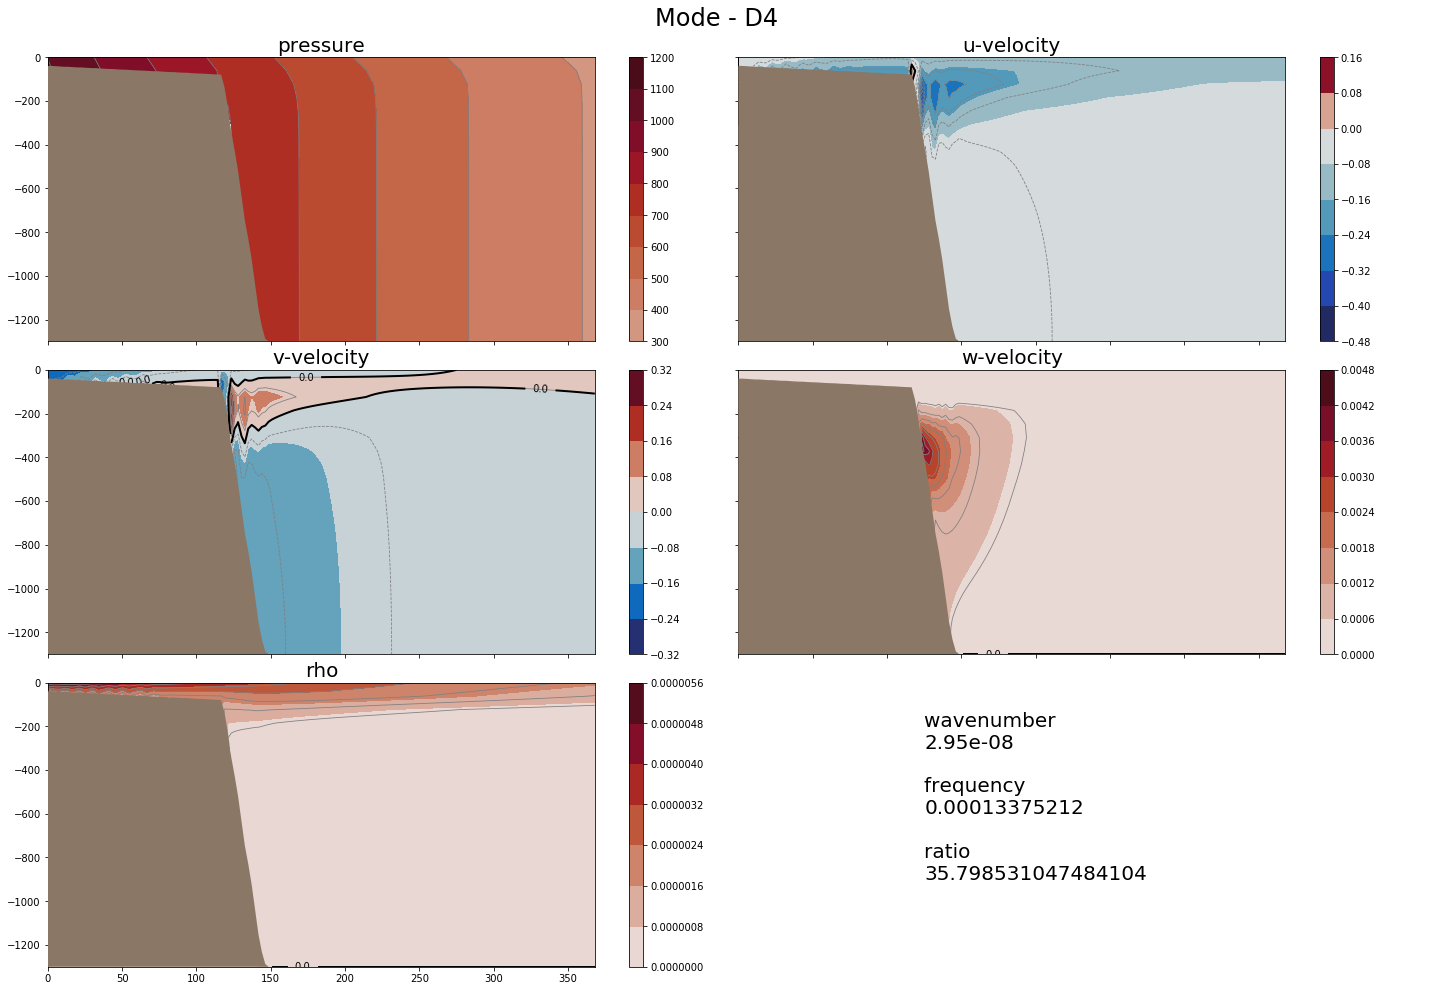

In [76]:
fig = plot_wave_structure('figures_D4.mat', 'D4')

same mode (D), but structure looks very different but not unrealistic?


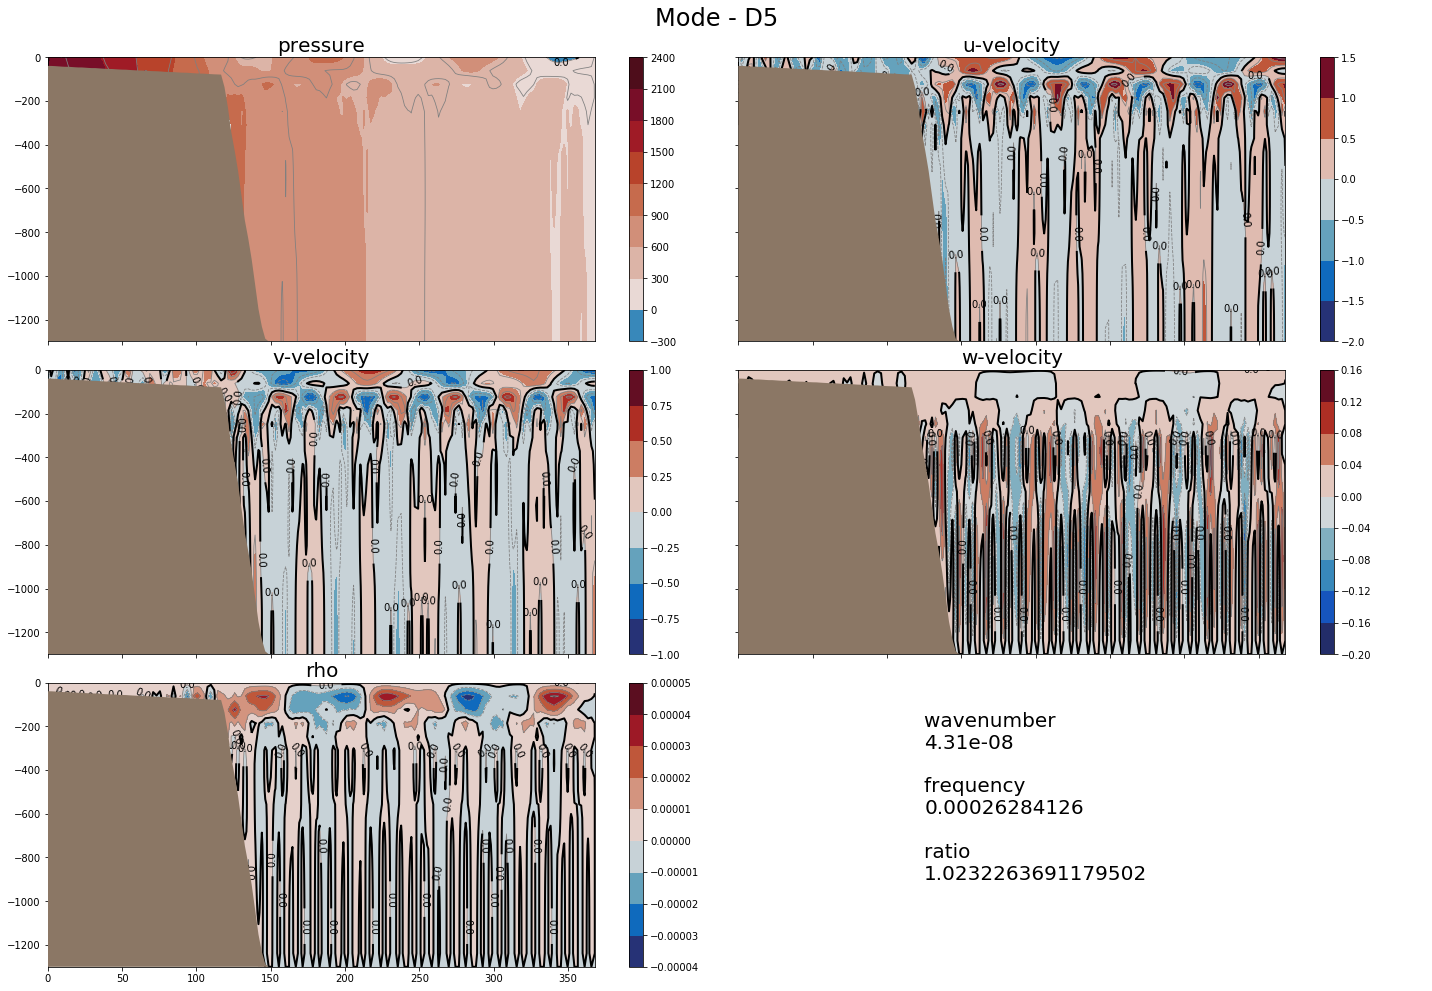

In [77]:
fig = plot_wave_structure('figures_D5.mat', 'D5')
print('same mode (D), but structure looks very different but not unrealistic?')

dispersion curve for mode E does not look right, but it was an attempt to find modes with much higher frequencies


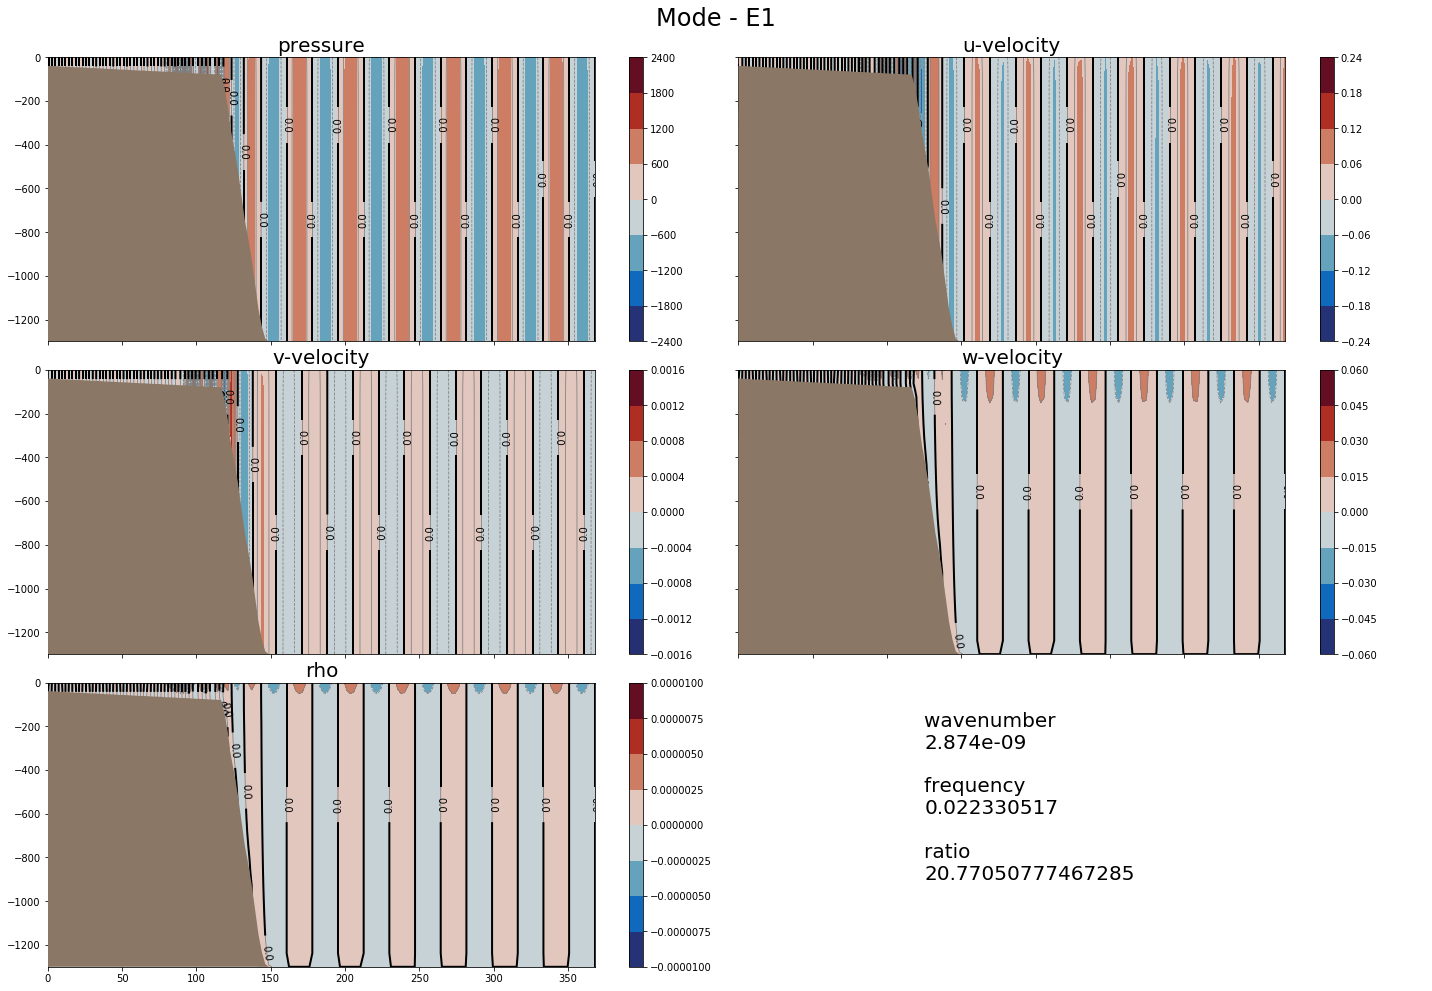

In [78]:
fig = plot_wave_structure('figures_E1.mat', 'E1')
print('dispersion curve for mode E does not look right, but it was an attempt to find modes with much higher frequencies')

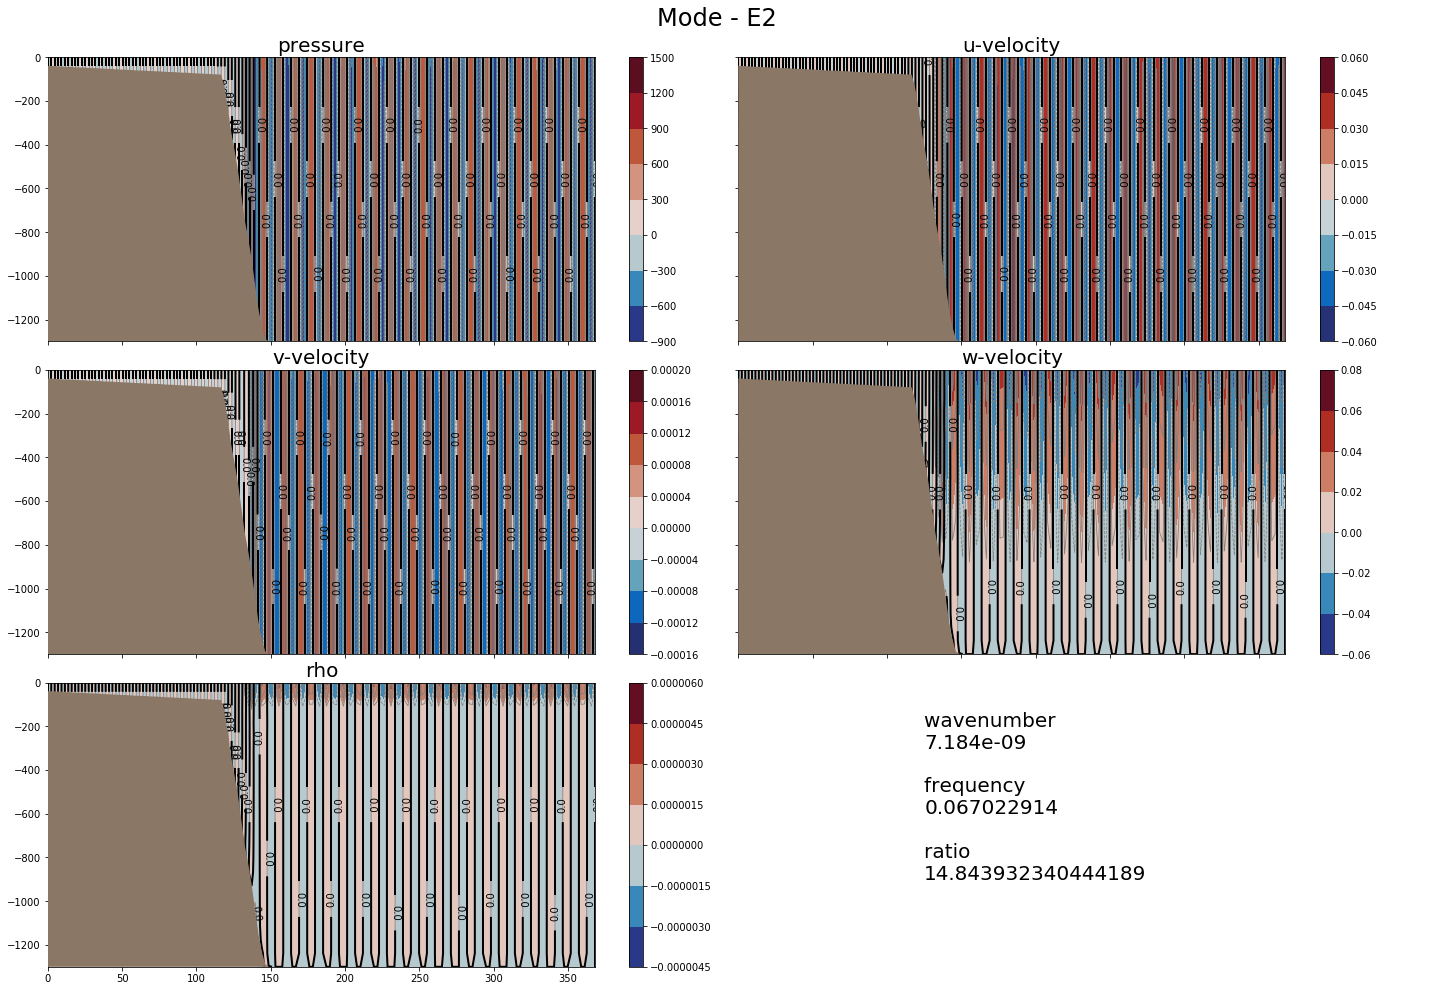

In [79]:
fig = plot_wave_structure('figures_E2.mat', 'E2')